# ***Iris FLower Classification***

---



# **Importing the libraries**

We will start the task at hand by importing the important libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Importing the dataset**

Here, we are uploading the dataset which is in the form of a csv file.



In [ ]:
ds=pd.read_csv("IRIS.csv")

# **Missing Data**

In [ ]:
missing_values = ds.isnull().sum()
missing_percentage = (ds.isnull().sum() / len(ds)) * 100
missing = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing)

              Missing Values  Percentage
sepal_length               0         0.0
sepal_width                0         0.0
petal_length               0         0.0
petal_width                0         0.0
species                    0         0.0


We have no null values in the dataset.

# **Duplicate Values**

In [ ]:
dup = ds.duplicated().sum()
print('Number of duplicated rows:', dup)

Number of duplicated rows: 3


We will proceed with the removal of duplicated observations.

In [ ]:
ds = ds.drop_duplicates(keep='first')

# **Exploratory Data Analysi**s



## Basic Statistical Analysis

In [ ]:
ds.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
ds.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.856463,3.055782,3.780272,1.208844,NaN
std,0.829100,0.437009,1.759111,0.757874,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
ds.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


## Pie Chart

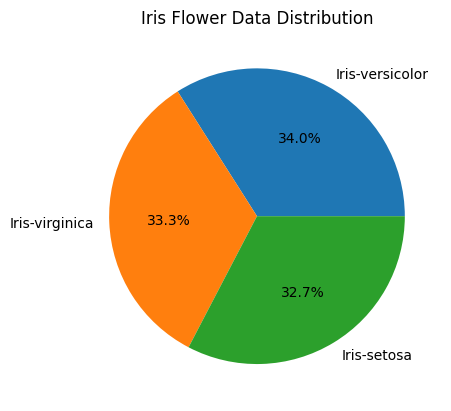

In [ ]:
from itertools import count
label=ds.species.value_counts().index
count=ds.species.value_counts().values
plt.pie(count, labels=label, autopct='%1.1f%%')
plt.title('Iris Flower Data Distribution')
plt.show()

As we can see from the above pie chat, the dataset is balanced.

## Pair Plot

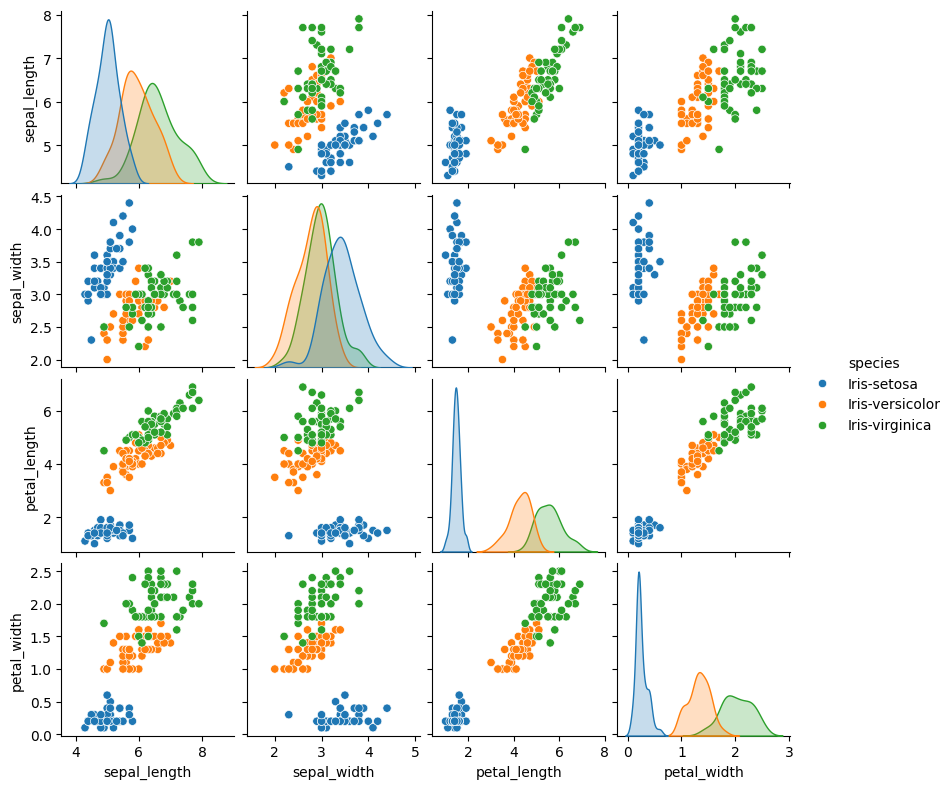

In [ ]:
sns.pairplot(ds,hue='species', height = 2)
plt.show()

While Setosa can be easily identified, Versicolor and Virginica species are showing very close resemblance on all variables.

## Box Plot

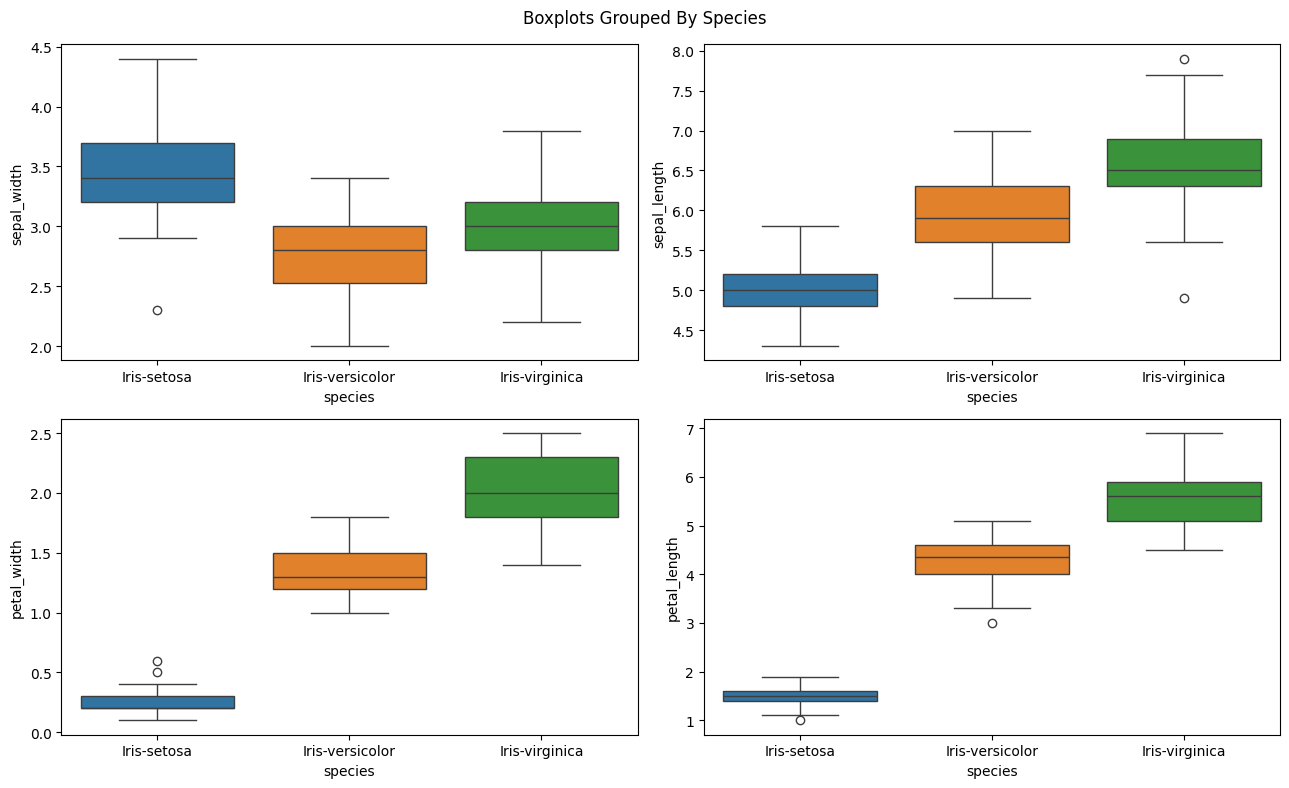

In [ ]:
plt.figure(figsize=(13, 8))
plt.suptitle('Boxplots Grouped By Species')
plt.subplot(2,2,1)
sns.boxplot(data=ds, x= 'species', y='sepal_width', hue='species')
plt.subplot(2,2,2)
sns.boxplot(data=ds, x= 'species', y='sepal_length', hue='species')
plt.subplot(2,2,3)
sns.boxplot(data=ds, x= 'species', y='petal_width', hue='species')
plt.subplot(2,2,4)
sns.boxplot(data=ds, x= 'species', y='petal_length', hue='species')
plt.tight_layout()
plt.show()

From the above graphs, we can observe the following:-

1) Setosa has the smallest features and is less distributed with some outliers.

2) Versicolor has the average features.

3) Virginica has the highest features.

 #  **Data Preprocessing**

Data preprocessing is crucial for preparing the dataset for modeling. This step involves handling missing values, dealing with outliers, converting categorical variables into numerical format, etc. Data cleaning ensures that the dataset is ready for analysis and modeling.



## Encoding categorial data

First, we will be splitting the dataset into the independent variable matrix (**X**) and dependent variable vector (**y**).

**y** consists of the target variable which is 'species' & **X** will consist of all the remaining columns in the dataset.

In [ ]:
X=ds.iloc[:,0:-1].values
y=ds.iloc[:,-1].values

Independent Variable Matrix

In [ ]:
Xprint=pd.DataFrame(X)
Xprint.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Xprint.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target Variable

In [ ]:
yprint=pd.DataFrame(y)
yprint.columns=['species']
yprint.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### Encoding the dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the data into test set and training set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Training

With the preprocessed dataset, we proceed to select machine learning models for classification. We train various models (e.g., logistic regression, decision trees, random forests, etc), and evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logistic=LogisticRegression()
classifier_logistic.fit(X_train, y_train)

Predicting Test Set Results

In [ ]:
y_test_pred_lr=classifier_logistic.predict(X_test)

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_test_pred_lr)
print(cm)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]


Model Performance Metrics

In [ ]:
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      1.00      0.91        10
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_decisiontree=DecisionTreeClassifier(criterion="entropy")
classifier_decisiontree.fit(X_train, y_train)

Predicting Test Set Results

In [ ]:
y_test_pred_dt=classifier_decisiontree.predict(X_test)

Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,y_test_pred_dt)
print(cm)

[[8 0 0]
 [0 8 2]
 [0 3 9]]


Model Performance Metrics

In [ ]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.73      0.80      0.76        10
           2       0.82      0.75      0.78        12

    accuracy                           0.83        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.84      0.83      0.83        30



## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
classifier_rf.fit(X_train, y_train)

Predicting Test Set Results

In [ ]:
y_test_pred_rf=classifier_rf.predict(X_test)

Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,y_test_pred_rf)
print(cm)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  3  9]]


Model Performance Metrics

In [ ]:
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.77      1.00      0.87        10
           2       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.91        30
weighted avg       0.92      0.90      0.90        30



## K-Nearest Neighbor(K-NN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_knn.fit(X_train, y_train)

Predicting Test Set Results

In [ ]:
y_test_pred_knn=classifier_knn.predict(X_test)

Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test,y_test_pred_knn)
print(cm)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]


Model Performance Metrics

In [ ]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb= GaussianNB()
classifier_nb.fit(X_train,y_train)

Predicting Test Set Results

In [ ]:
y_test_pred_nb= classifier_nb.predict(X_test)

Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test, y_test_pred_nb)
print(cm)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]


Model Performance Metrics

In [ ]:
print(classification_report(y_test, y_test_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      1.00      0.91        10
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Support Vector Machine (SVM) Algorithm

In [ ]:
from sklearn.svm import SVC
classifier_svm=SVC(kernel='rbf')
classifier_svm.fit(X_train,y_train)

Predicting Test Set Results

In [ ]:
y_test_pred_svm=classifier_svm.predict(X_test)

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_svm)
print(cm)

[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]


Model Performance Metrics

In [ ]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      1.00      0.91        10
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# **Choice of Evaluation Metric**

After carefully considering the potential consequences of false positives and false negatives in the context of the objectives of this project, I have selected **recall** as the primary evaluation metric for our classification model.

This means that our goal is to maximize the number of true positives (correctly identified species) while minimizing the number of false negatives (incorrectly identified species). By doing so, we aim to ensure that we correctly identify as many different iris flowers, even if it means that we may have some false positives.

In [ ]:
from sklearn.metrics import recall_score
models= ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'Naive Bayes', 'SVM']
recalls=[recall_score(y_test, y_test_pred_lr,average='macro'),recall_score(y_test, y_test_pred_dt,average='macro'), recall_score(y_test, y_test_pred_rf,average='macro'),recall_score(y_test, y_test_pred_knn,average='macro'), recall_score(y_test, y_test_pred_nb,average='macro'), recall_score(y_test, y_test_pred_svm,average='macro'),]
recalltable=pd.DataFrame({'Model':models,'Recall':recalls})
recalltable

,Model,Recall
0,Logistic Regression,0.944444
1,Decision Tree,0.850000
2,Random Forest,0.916667
3,K-NN,0.972222
4,Naive Bayes,0.944444
5,SVM,0.944444


# **Model Selection**

The best results were obtained from **K-Nearest Neighbor Algorithm** with a recall of **97%**.

The accuracy of the model, interpreted as the percentage of correct classifications made, is also **97%** which is quite high.

Moreover, the F1 score of the model comes out to be **0.97** which is very close to 1. This tells us that the model does a pretty good job of classifying the species.

# **Key Findings and Conclusion**

In the Iris flower classification project, the **K-NN model** has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:



1. **Data Exploration**: Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species. We also found that Iris Virginica is the longest flower and Iris Setosa is the shortest.
2. **Data Preprocessing**: Data preprocessing steps, including handling missing and duplicated values, encoding categorical variables, feature scaling, were performed to prepare the dataset for modeling.
3. **Model Selection**: After experimenting with various machine learning models, K-NN was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.
4. **Model Training and Evaluation**: The K-NN model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory recall, accuracy and precision in classifying Iris species.

5. **Practical Application**: The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed K-NN as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.